Importing Financial Data with Python

In [74]:
!pip install yfinance
import yfinance as yf
!pip install plotly


# Define the time range
start = '2023-01-01'
end = '2023-12-31'

# Fetch data for Apple stock
apple_data = yf.download('AAPL', start=start, end=end)

# Display the first few rows
print(apple_data.head())


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.632530  129.395518  122.742873  128.782649  112117500
2023-01-04  124.907707  127.181276  123.642420  125.431615   89113600
2023-01-05  123.583092  126.301485  123.326085  125.668841   80962700
2023-01-06  128.130234  128.792531  123.454601  124.561732   87754700
2023-01-09  128.654144  131.876686  128.397138  128.970474   70790800


DATA CLEANING 

In [75]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Generate synthetic stock data
dates = pd.date_range(start="2019-01-01", end="2021-12-31", freq="D")
stock_prices = np.array([i + (i * 0.005) + (5 * i * 0.001 * (-1)**i) for i in range(len(dates))], dtype='float64')

# Ensure the DataFrame is clean and flat
data = pd.DataFrame({
    'ds': pd.to_datetime(dates),
    'y': pd.Series(stock_prices).astype('float')
})


In [76]:
# Check for missing values
missing_values = apple_data.isnull().sum()

# Handle missing values (in this case, using forward fill method)
apple_data.fillna(method='ffill', inplace=True)

[*********************100%***********************]  1 of 1 completed


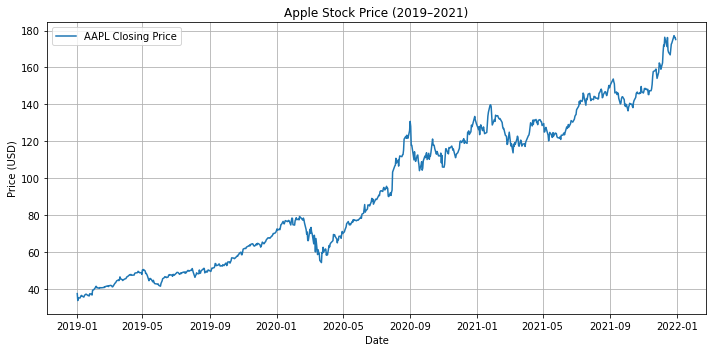

In [77]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker and date range
ticker = 'AAPL'
start = '2019-01-01'
end = '2021-12-31'

# Fetch historical data
apple_data = yf.download(ticker, start=start, end=end)

# Plot closing price
plt.figure(figsize=(10, 5))
plt.plot(apple_data['Close'], label='AAPL Closing Price')
plt.title('Apple Stock Price (2019–2021)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [78]:
# Check for missing values
missing_values = apple_data.isnull().sum()

# Handle missing values (in this case, using forward fill method)
apple_data.fillna(method='ffill', inplace=True)
     

Visualizing Patterns with Python

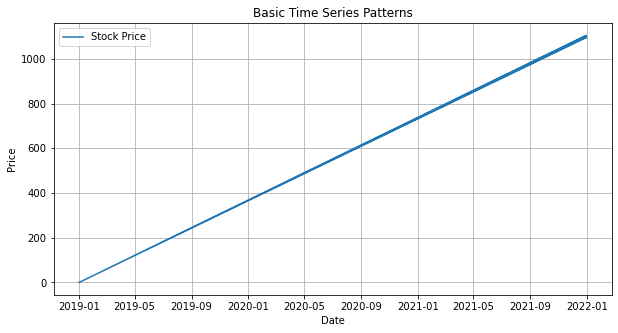

In [79]:
import pandas as pd
import matplotlib.pyplot as plt



import matplotlib.pyplot as plt
import numpy as np

# Ensure both inputs are 1D arrays
dates = np.array(dates)
stock_prices = np.array(stock_prices)

plt.figure(figsize=(10, 5))
plt.plot(dates, stock_prices, label='Stock Price')
plt.title('Basic Time Series Patterns')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


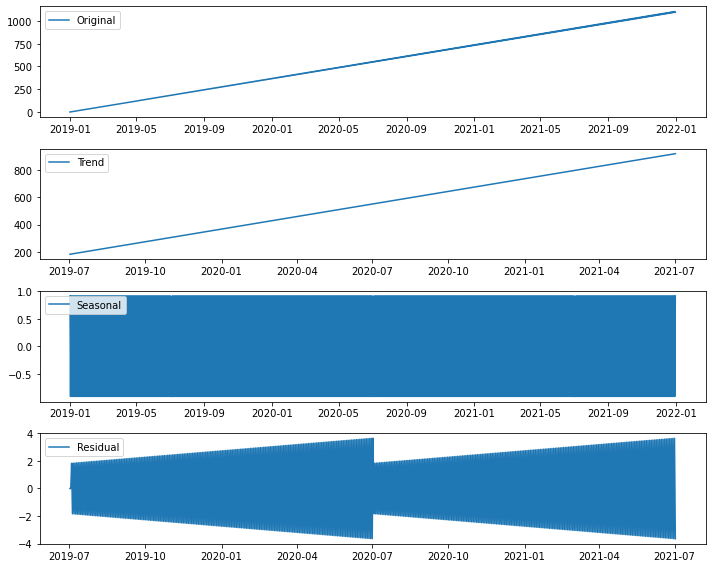

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Create date range and synthetic stock prices
dates = pd.date_range(start="2019-01-01", end="2021-12-31", freq="D")
stock_prices = [i + (i * 0.005) + (5 * i * 0.001 * (-1)**i) for i in range(len(dates))]

# Convert to a proper time series (Pandas Series with DateTimeIndex)
stock_series = pd.Series(stock_prices, index=dates)

# Decomposition using correct parameter
result = seasonal_decompose(stock_series, model='additive', period=365)

# Visualization
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


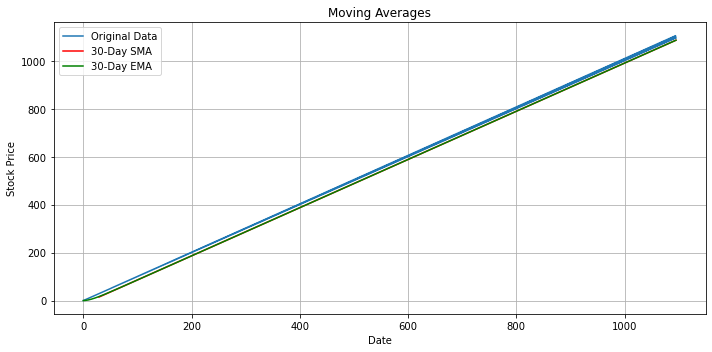

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data (use real financial data for a comprehensive analysis)
dates = pd.date_range(start="2019-01-01", end="2021-12-31", freq="D")
stock_prices = [i + (i * 0.005) + (5 * i * 0.001 * (-1)**i) for i in range(len(dates))]

# Calculate moving averages
sma = pd.Series(stock_prices).rolling(window=30).mean()
ema = pd.Series(stock_prices).ewm(span=30, adjust=False).mean()

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(stock_prices, label='Original Data')
plt.plot(sma, color='red', label='30-Day SMA')
plt.plot(ema, color='green', label='30-Day EMA')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
     

<Figure size 720x360 with 0 Axes>

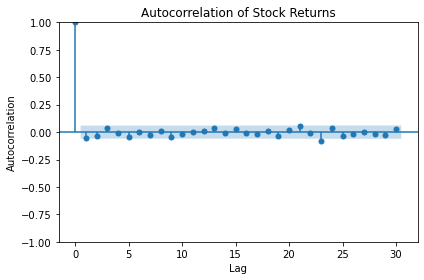

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Sample data (use real financial data for deeper insights)
dates = pd.date_range(start="2019-01-01", end="2021-12-31", freq="D")
stock_returns = [np.random.randn() for _ in range(len(dates))]

# Plot autocorrelation
plt.figure(figsize=(10, 5))
plot_acf(stock_returns, lags=30)
plt.title('Autocorrelation of Stock Returns')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.tight_layout()
plt.show()

In [83]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Sample data (use real financial data for comprehensive insights)
dates = pd.date_range(start="2019-01-01", end="2021-12-31", freq="D")
stock_prices = [i + (i * 0.005) + (5 * i * 0.001 * (-1)**i) for i in range(len(dates))]

# Perform ADF test
result = adfuller(stock_prices)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 0.2048478329239457
p-value: 0.9725321871217977
Critical Values: {'1%': -3.4363635475753824, '5%': -2.864195245967465, '10%': -2.5681837404258903}


In [84]:
import numpy as np
import pandas as pd

# Suppose you want to forecast the next 30 days
future_dates_array = pd.date_range(start="2022-01-01", periods=30)
forecast_flat = np.random.randn(30)  # Mock forecast values

# Now print their shapes
print(f"Future dates shape: {future_dates_array.shape}")
print(f"Forecast shape: {forecast_flat.shape}")



Future dates shape: (30,)
Forecast shape: (30,)


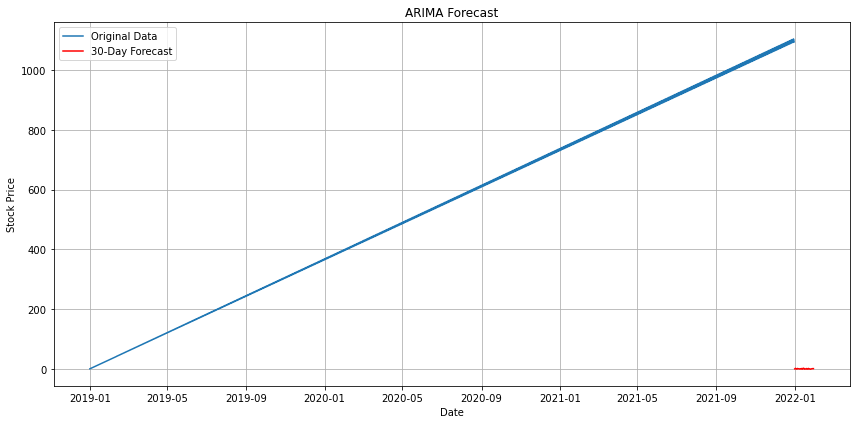

In [85]:
# Ensure correct data types and dimensions
future_dates_array = np.array(future_dates_array)        # Convert to NumPy array
forecast_flat = np.array(forecast_flat).flatten()        # Ensure 1D shape

# Plot
plt.figure(figsize=(12, 6))
plt.plot(stock_series, label='Original Data')
plt.plot(future_dates_array, forecast_flat, color='red', label='30-Day Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/Users/oreoluwa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/oreoluwa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


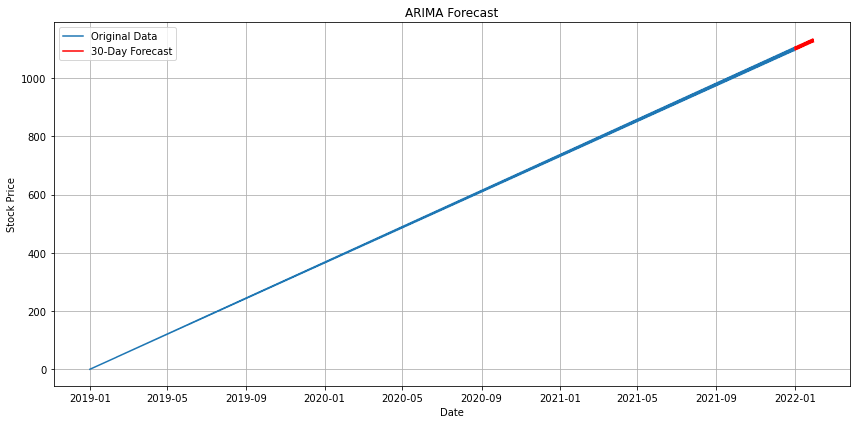

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Create sample time series
dates = pd.date_range(start="2019-01-01", end="2021-12-31", freq="D")
stock_prices = [i + (i * 0.005) + (5 * i * 0.001 * (-1)**i) for i in range(len(dates))]
stock_series = pd.Series(stock_prices, index=dates)

# Fit ARIMA model
model = ARIMA(stock_series, order=(5, 1, 0))  # Simple ARIMA model
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)
forecast_flat = np.ravel(forecast)

# Create future date range
future_dates = pd.date_range(start=stock_series.index[-1] + pd.Timedelta(days=1), periods=30)
future_dates_array = np.array(future_dates)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(stock_series, label='Original Data')
plt.plot(future_dates_array, forecast_flat, color='red', label='30-Day Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [87]:
from statsmodels.tsa.arima.model import ARIMA

# Use a proper time series if possible (Pandas Series with DateTimeIndex)
model = ARIMA(stock_prices, order=(5, 1, 0))
model_fit = model.fit()  # 👈 remove disp=0

# Forecast
forecast = model_fit.forecast(steps=10)
print(forecast)


/Users/oreoluwa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


[1106.95933899 1097.00175811 1108.97571012 1099.00746157 1110.98767328
 1101.01736737 1112.99629484 1103.02927377 1115.00444265 1105.04028248]


/Users/oreoluwa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [88]:
!pip install prophet




In [89]:
# Sample data (use real financial data for deeper insights)
dates = pd.date_range(start="2019-01-01", end="2021-12-31", freq="D")
stock_prices = [i + (i * 0.005) + (5 * i * 0.001 * (-1)**i) for i in range(len(dates))]

# Ensure 1D float series
data = pd.DataFrame({'ds': pd.to_datetime(dates), 'y': pd.Series(stock_prices, dtype='float')})


<Figure size 720x360 with 0 Axes>

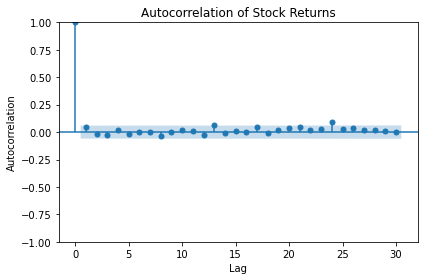

In [90]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Sample data (use real financial data for deeper insights)
dates = pd.date_range(start="2019-01-01", end="2021-12-31", freq="D")
stock_returns = [np.random.randn() for _ in range(len(dates))]

# Plot autocorrelation
plt.figure(figsize=(10, 5))
plot_acf(stock_returns, lags=30)
plt.title('Autocorrelation of Stock Returns')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.tight_layout()
plt.show()

In [91]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Generate synthetic data
dates = pd.date_range(start="2019-01-01", end="2021-12-31", freq="D")
stock_prices = [i + (i * 0.005) + (5 * i * 0.001 * (-1)**i) for i in range(len(dates))]
data = pd.DataFrame({'ds': dates, 'y': stock_prices})

# Fit Prophet model
model = Prophet(daily_seasonality=True)
model.fit(data)

# Make forecast
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Check forecast structure
print(forecast.head())         # Preview
print(forecast.columns)        # Make sure 'ds', 'yhat', etc. are there


17:39:10 - cmdstanpy - INFO - Chain [1] start processing
17:39:11 - cmdstanpy - INFO - Chain [1] done processing


          ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2019-01-01  0.001334   -4.294900    4.035110     0.001334     0.001334   
1 2019-01-02  1.006293   -3.387529    5.016745     1.006293     1.006293   
2 2019-01-03  2.011253   -2.110861    5.975380     2.011253     2.011253   
3 2019-01-04  3.016212   -1.273114    6.842393     3.016212     3.016212   
4 2019-01-05  4.021172   -0.166608    8.192896     4.021172     4.021172   

   additive_terms  additive_terms_lower  additive_terms_upper     daily  ...  \
0       -0.024970             -0.024970             -0.024970  0.005336  ...   
1       -0.059887             -0.059887             -0.059887  0.005336  ...   
2       -0.024557             -0.024557             -0.024557  0.005336  ...   
3       -0.058473             -0.058473             -0.058473  0.005336  ...   
4       -0.057370             -0.057370             -0.057370  0.005336  ...   

     weekly  weekly_lower  weekly_upper    yearly  yearly_lowe

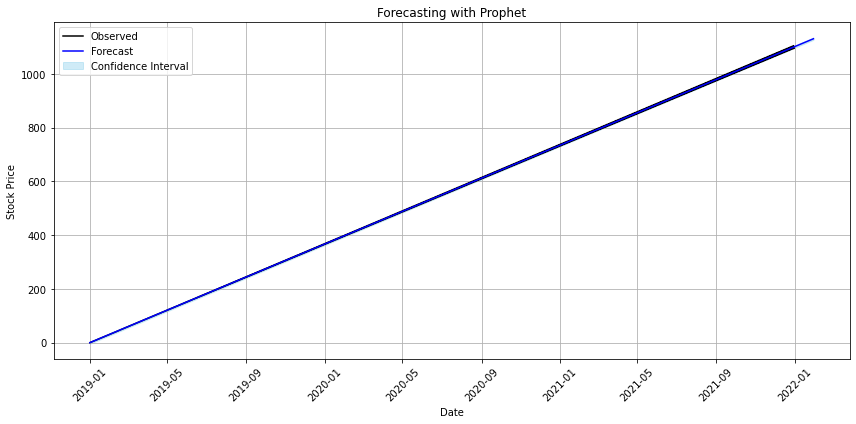

In [92]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Extract NumPy arrays to avoid pandas indexing errors
ds_data = data['ds'].to_numpy()
y_data = data['y'].to_numpy()
ds_forecast = forecast['ds'].to_numpy()
yhat = forecast['yhat'].to_numpy()
yhat_lower = forecast['yhat_lower'].to_numpy()
yhat_upper = forecast['yhat_upper'].to_numpy()

# Manual Plot
plt.figure(figsize=(12, 6))
plt.plot(ds_data, y_data, label='Observed', color='black')
plt.plot(ds_forecast, yhat, label='Forecast', color='blue')
plt.fill_between(ds_forecast, yhat_lower, yhat_upper, color='skyblue', alpha=0.4, label='Confidence Interval')

plt.title('Forecasting with Prophet')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

# Optional: Clean up date formatting
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

ARIMA Forecasting with Visualization (Using Synthetic Data)



/Users/oreoluwa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/oreoluwa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


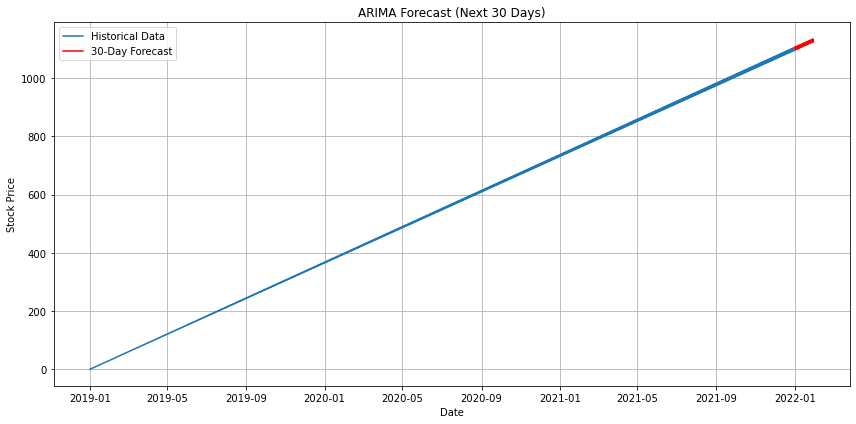

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate sample stock-like data
dates = pd.date_range(start='2019-01-01', end='2021-12-31', freq='D')
stock_prices = [i + (i * 0.005) + (5 * i * 0.001 * (-1)**i) for i in range(len(dates))]
stock_series = pd.Series(stock_prices, index=dates)

# Fit ARIMA model (adjust p, d, q as needed)
model = ARIMA(stock_series, order=(5, 1, 0))
model_fit = model.fit()

# Forecast 30 future steps
forecast = model_fit.forecast(steps=30)
forecast_dates = pd.date_range(start=stock_series.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Combine for plotting
forecast_series = pd.Series(forecast, index=forecast_dates)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(stock_series, label='Historical Data')
plt.plot(forecast_series, color='red', label='30-Day Forecast')
plt.title('ARIMA Forecast (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/Users/oreoluwa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/oreoluwa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


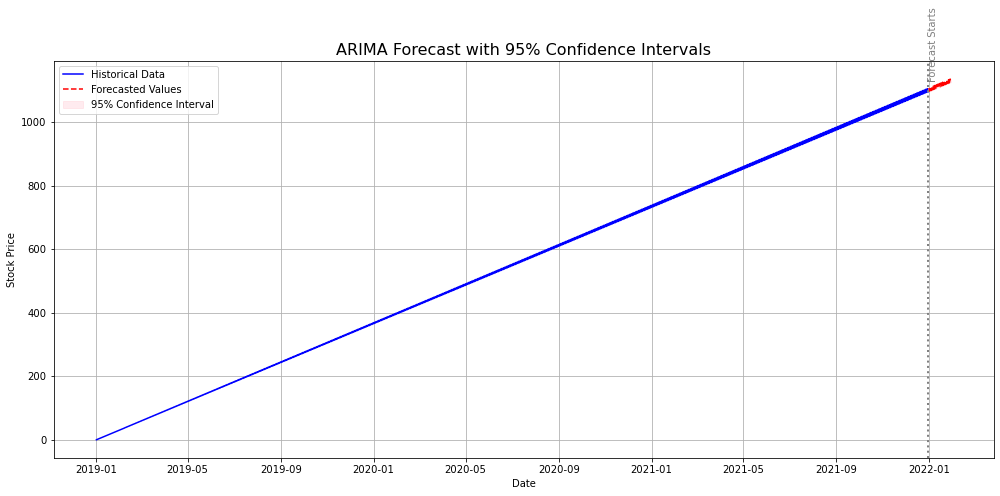

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Sample time series data
dates = pd.date_range(start='2019-01-01', end='2021-12-31', freq='D')
stock_prices = [i + (i * 0.005) + (5 * i * 0.001 * (-1)**i) for i in range(len(dates))]
stock_series = pd.Series(stock_prices, index=dates)

# Fit ARIMA model
model = ARIMA(stock_series, order=(5, 1, 0))
model_fit = model.fit()

# Forecast with confidence intervals
forecast_result = model_fit.get_forecast(steps=30)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Dates for forecast
forecast_dates = pd.date_range(start=stock_series.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast.index = forecast_dates
conf_int.index = forecast_dates

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(stock_series, label='Historical Data', color='blue')
plt.plot(forecast, label='Forecasted Values', color='red', linestyle='--')
plt.fill_between(forecast.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')

# Add vertical line to show forecast starting point
plt.axvline(x=stock_series.index[-1], color='gray', linestyle=':', lw=2)
plt.text(stock_series.index[-1], plt.ylim()[1]*0.95, 'Forecast Starts', rotation=90, color='gray')

# Titles and labels
plt.title('ARIMA Forecast with 95% Confidence Intervals', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


/Users/oreoluwa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/oreoluwa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


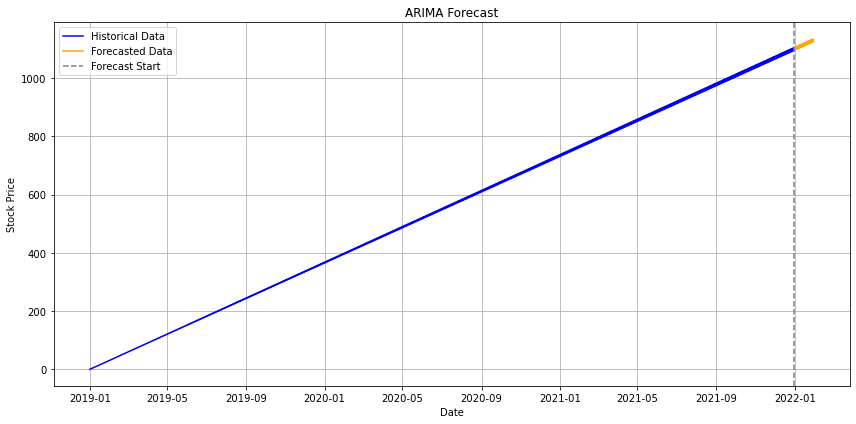

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Sample time series
dates = pd.date_range(start="2019-01-01", end="2021-12-31", freq="D")
stock_prices = [i + (i * 0.005) + (5 * i * 0.001 * (-1)**i) for i in range(len(dates))]
stock_series = pd.Series(stock_prices, index=dates)

# Fit ARIMA model
model = ARIMA(stock_series, order=(5, 1, 0))
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)
forecast_flat = forecast.values

# Create future date range
future_dates = pd.date_range(start=stock_series.index[-1] + pd.Timedelta(days=1), periods=30)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(np.array(stock_series.index), np.array(stock_series.values), label='Historical Data', color='blue')
plt.plot(np.array(future_dates), forecast_flat, label='Forecasted Data', color='orange')
plt.axvline(x=stock_series.index[-1], color='gray', linestyle='--', label='Forecast Start')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



